In [1]:
import sys
sys.path.insert(0,'../')
from utils import get_ex_results, move_legend
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import numpy as np
import pandas as pd

sns.set()
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

In [2]:
from get_data import get_train_test_data
from tools import add_time
from train import SignatureOrderSelection, SignatureRegression, select_hatm_cv, select_nbasis_cv, BasisRegression
from plot_tensor_heatmap import plot_tensor_heatmap

In [3]:
palette = sns.color_palette("colorblind")

# Illustration of the estimation method

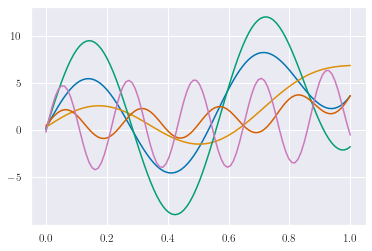

In [5]:
npoints = 100
Xtrain, Ytrain, Xval, Yval = get_train_test_data('smooth', ntrain=100, nval=10,  Y_type='sig', npoints=npoints, d=5, scale_X=False, seed=16)
palette = sns.color_palette('colorblind')
for j in range(Xtrain.shape[2]):
    plt.plot(np.linspace(0,1,num=npoints),Xtrain[0,:,j], color=palette[j])
plt.savefig('Figures/samples_X_polysinus_independent.pdf', bbox_inches='tight')
plt.show()

In [6]:
Xtrain, Ytrain, Xval, Yval = get_train_test_data('smooth', ntrain=10, nval=10,  Y_type='sig', npoints=npoints, d=2, scale_X=False, seed=16)

 /Users/fermanian/Documents/Thèse/Model selection/Code/venv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:1515: RuntimeWarning:divide by zero encountered in true_divide


3


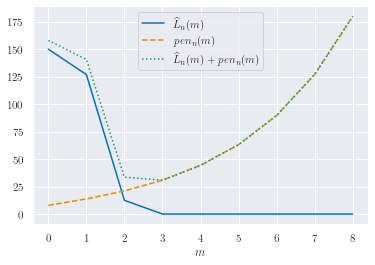

In [7]:
Xtimetrain = add_time(Xtrain)
order_sel = SignatureOrderSelection(2, Kpen=20)
hatm = order_sel.get_hatm(Xtimetrain, Ytrain, plot=True)
print(hatm)
plt.savefig('Figures/illustration_estimation_m.pdf', bbox_inches='tight')

# Estimator convergence

In [9]:
Xtrain, Ytrain, Xval, Yval = get_train_test_data('smooth', ntrain=50, nval=10,  Y_type='sig', npoints=npoints, d=2, scale_X=False, seed=16)
Xtimetrain = add_time(Xtrain)
Xtimeval = add_time(Xval)

8


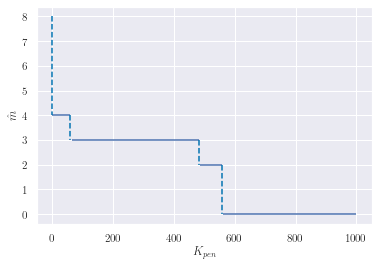

Enter slope heuristic constant Kpen: 100
Hatm 3


In [10]:
order_sel = SignatureOrderSelection(Xtimetrain.shape[2], max_features = 10 ** 4)
print(order_sel.max_k)
Kpen_grid = np.concatenate([[0.], np.linspace(10 ** (-1), 10 **3, num=200)])
hatm = order_sel.get_hatm(Xtimetrain, Ytrain, Kpen_values=Kpen_grid, plot=False, savefig=True)
print("Hatm", hatm)

In [11]:
df = get_ex_results('results/estimator_convergence')
df['hatm'] = df['hatm'].astype(int)

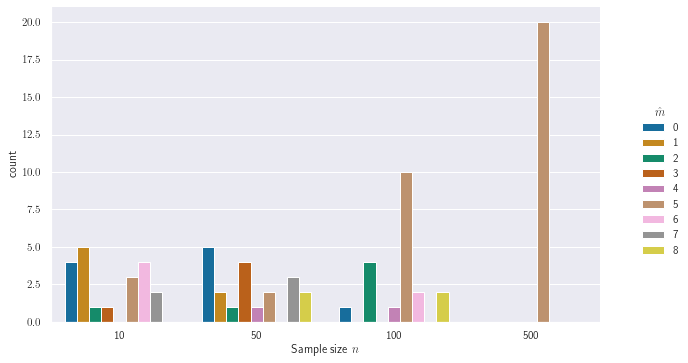

In [12]:
g = sns.catplot(x='ntrain', hue="hatm", data=df, kind="count", palette="colorblind")
g.fig.set_size_inches(10,5)
plt.xlabel(r"Sample size $n$")
g._legend.set_title(r"$\hat{m}$")
plt.savefig('Figures/convergence_hatm.pdf', bbox_inches='tight')
plt.show()

# Comparison of spline and signature regression when d varies

In [13]:
df = get_ex_results('results/dim_study')
df['regressor'] = df['regressor'].replace({'signature': 'Signature', 'spline': 'B-Spline', 'fourier':'Fourier', 'fPCA': 'fPCR'})
df = df[df['Y_type'] == 'mean']

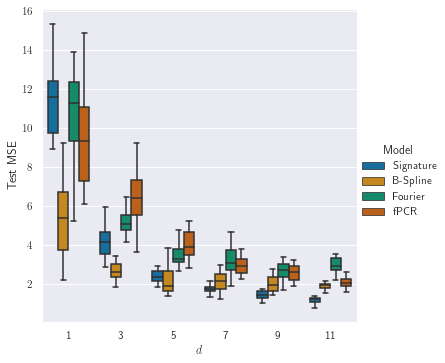

In [14]:
g = sns.catplot(x="d", y="val.error", hue="regressor", data=df[df['X_type']=='independent'], kind='box', 
                 sharey=False, palette="colorblind", showfliers=False, col_order=['mean','max'])

g.set_axis_labels(r"$d$", "Test MSE")
g._legend.set_title("Model")
plt.savefig("Figures/dimension_study_independent_sinus.pdf", bbox_inches='tight')
plt.show()

# Gaussian processes

In [15]:
Xtrain, Ytrain, Xval, Yval = get_train_test_data('gp',ntrain=1, nval=1, npoints=100, d=5, scale_X=False)

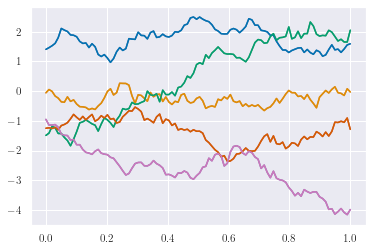

In [18]:
plt.plot(np.linspace(0, 1, num=Xtrain.shape[1]), Xtrain[0,:,:])
palette = sns.color_palette('colorblind')
for j in range(Xtrain.shape[2]):
    plt.plot(np.linspace(0,1,num=100),Xtrain[0,:,j], color=palette[j])
plt.savefig("Figures/samples_gaussian_processes.pdf", bbox_inches='tight')
plt.show()

In [19]:
df = get_ex_results('results/dim_study_gp')

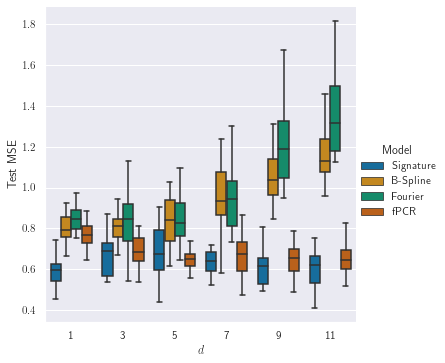

In [20]:
df['regressor'] = df['regressor'].replace({'signature': 'Signature', 'bspline': 'B-Spline', 'fourier':'Fourier', 'fPCA': 'fPCR'})
g = sns.catplot(x="d", y="val.error", hue="regressor", data=df, kind='box', 
                 sharey=False, palette="colorblind", showfliers=False)

g.axes.flat[0].set_title("")

g.set_axis_labels(r"$d$", "Test MSE")
g._legend.set_title("Model")
plt.savefig("Figures/dimension_study_gaussian_processes.pdf", bbox_inches='tight')
plt.show()

# Air Quality Data Set

In [21]:
Xtrain, Ytrain, Xval, Yval = get_train_test_data('air_quality', scale_X=True, univariate=False)

(6156, 168, 3)


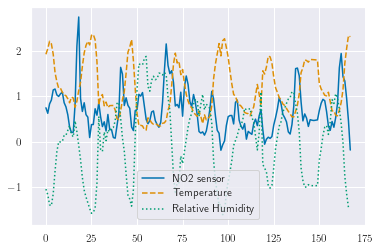

In [22]:
print(Xtrain.shape)
plt.plot(Xtrain[0, :, 0], label='NO2 sensor', color=palette[0])
plt.plot(Xtrain[0, :, 1], label='Temperature',  color=palette[1], linestyle='dashed')
plt.plot(Xtrain[0, :, 2], label='Relative Humidity', color=palette[2], linestyle='dotted')
plt.legend()
plt.savefig('Figures/samples_air_quality.pdf', bbox_inches='tight')
plt.show()

In [23]:
df = get_ex_results('results/air_quality')

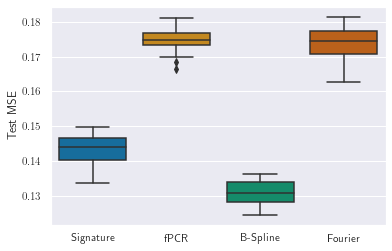

In [24]:
df['regressor'] = df['regressor'].replace({'signature': 'Signature', 'bspline': 'B-Spline', 'fourier':'Fourier', 'fPCA': 'fPCR'})
g = sns.boxplot(x="regressor", y="val.error", data=df[df['univariate']=='True'], palette="colorblind")

g.set(xlabel="", ylabel="Test MSE")
plt.savefig("Figures/air_quality_univariate.pdf", bbox_inches='tight')
plt.show()

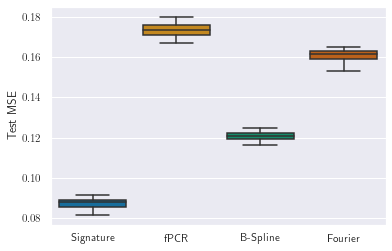

In [25]:
df['regressor'] = df['regressor'].replace({'signature': 'Signature', 'bspline': 'B-Spline', 'fourier':'Fourier', 'fPCA': 'fPCR'})
g = sns.boxplot(x="regressor", y="val.error", data=df[df['univariate']=='False'], palette="colorblind")

g.set(xlabel="", ylabel="Test MSE")
plt.savefig("Figures/air_quality_multivariate.pdf", bbox_inches='tight')
plt.show()

In [26]:
df_univariate = df[df['univariate']=='True']
df_multivariate = data=df[df['univariate']=='False']

print(df_univariate.groupby('regressor')['val.error'].mean())
print(df_multivariate.groupby('regressor')['val.error'].mean())

regressor
B-Spline     0.130898
Fourier      0.173838
Signature    0.143005
fPCR         0.174596
Name: val.error, dtype: float64
regressor
B-Spline     0.120579
Fourier      0.160788
Signature    0.087182
fPCR         0.173660
Name: val.error, dtype: float64


In [27]:
print(0.087182/0.174596)

0.49933560906320873
